In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()

In [5]:
cos_sim = []

In [6]:
def get_cosine_similarity(doc):
    sparse_matrix = count_vectorizer.fit_transform(doc)
    doc_term_matrix = sparse_matrix.todense()
    df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names())
    distance = cosine_similarity(df, df)
    return distance

In [7]:
myFile = []
f = open('38_ben50int50_mixed','r', encoding = "UTF-8")

for line in f:
    myFile.append(line.strip())

In [8]:
len(myFile)

1002

In [9]:
#Sequential Cosine Similarity Calculation i.e., between 2 consecutive sentences at a time)
import time
doc = []
start = time.time()
for i in range(0, len(myFile)-1):
    doc.append(myFile[i])
    doc.append(myFile[i+1])
    #doc.append(myFile[i+2])
    cs = get_cosine_similarity(doc)
    cos_sim_val = cs[0][1]
    #print(f'CS between sentence {i+1} ({myFile[i]}) and sentence {i+2} ({myFile[i+1]}) is:\n{cs}\n')
    cos_sim.append(cos_sim_val)
    doc = []
end = time.time()

time1 = end-start
print(f"Time taken to run CS is {time1}")

Time taken to run CS is 0.8843479156494141


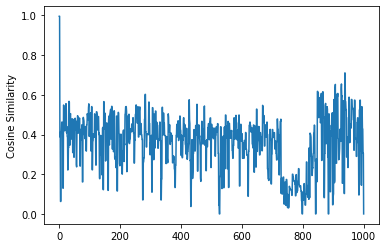

In [10]:
plt.plot(cos_sim)
plt.ylabel("Cosine Similarity")
plt.show()

Text(0.5, 1.0, 'Benign Texts 50 - Intermediate Texts 50 MIX')

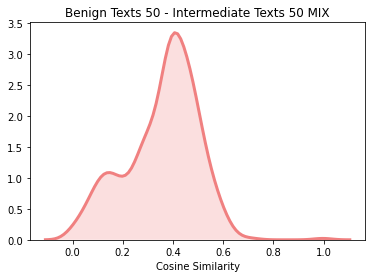

In [12]:
# Density Plot and Histogram of all benign scores
sns.distplot(cos_sim, hist=False, kde=True, 
             bins=int(180/5), color = 'lightcoral', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade' : True,'linewidth': 3})#.set(xlim=(-0.3, 1.3),ylim=(0, 5))
plt.xlabel("Cosine Similarity")
plt.title("Benign Texts 50 - Intermediate Texts 50 MIX")

Text(0.5, 1.0, 'Benign Texts 50 - Intermediate Texts 50 MIX')

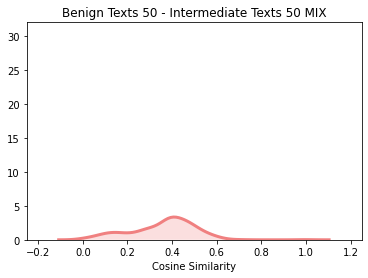

In [14]:
# Density Plot and Histogram of all benign scores
sns.distplot(cos_sim, hist=False, kde=True, 
             bins=int(180/5), color = 'lightcoral', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade' : True,'linewidth': 3}).set(xlim=(-0.25, 1.25),ylim=(0, 32))
plt.xlabel("Cosine Similarity")
plt.title("Benign Texts 50 - Intermediate Texts 50 MIX")

In [13]:
with open('38_cs_ben50int50_file_mix.txt', 'w') as f:
    for item in cos_sim:
        f.write("%s\n" % item)